In [ ]:
Market Basket Analysis: Apriori Algorithm 
Dataset: Order1.csv
The dataset has 38765 rows of the purchase orders of people from the 
grocery stores. These orders can be analysed, and association rules can 
be generated using Market Basket Analysis by algorithms like Apriori 
Algorithm.
Follow following Steps:
a. Data Pre-processing
b. Generate the list of transactions fromthe dataset
c. Train Apriori on the dataset
d. Visualize the list of datasets


In [6]:
!pip install mlxtend


                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
     --                                       0.1/1.4 MB 525.1 kB/s eta 0:00:03
     ---                                      0.1/1.4 MB 516.7 kB/s eta 0:00:03
     ----                                     0.2/1.4 MB 614.4 kB/s eta 0:00:03
     -----                                    0.2/1.4 MB 692.4 kB/s eta 0:00:02
     ------                                   0.2/1.4 MB 754.9 kB/s eta 0:00:02
     -------                                  0.3/1.4 MB 770.1 kB/s eta 0:00:02
     ---------                                0.3/1.4 MB 754.0 kB/s eta 0:00:02
     ---------                                0.3/1.4 MB 723.4 kB/s eta 0:00:02
     ----------                               0.4/1.4 MB 740.5 kB/s eta 0:00


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Order1.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [22]:
data['Date'] = pd.to_datetime(data['Date'])

In [23]:
transactions = data.groupby('Member_number')['itemDescription'].apply(list).tolist()

In [24]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [25]:
min_support = 0.02
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

In [26]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [27]:
print("List of Datasets:")
print(frequent_itemsets)

List of Datasets:
      support                                           itemsets
0    0.078502                                         (UHT-milk)
1    0.031042                                    (baking powder)
2    0.119548                                             (beef)
3    0.079785                                          (berries)
4    0.062083                                        (beverages)
..        ...                                                ...
889  0.027963       (other vegetables, soda, whole milk, yogurt)
890  0.021293  (tropical fruit, other vegetables, whole milk,...
891  0.021036            (sausage, whole milk, soda, rolls/buns)
892  0.022832          (sausage, whole milk, rolls/buns, yogurt)
893  0.024628             (whole milk, soda, rolls/buns, yogurt)

[894 rows x 2 columns]


In [28]:
print("\nAssociation Rules:")
print(rules)


Association Rules:
               antecedents                       consequents  \
0               (UHT-milk)                   (bottled water)   
1          (bottled water)                        (UHT-milk)   
2       (other vegetables)                        (UHT-milk)   
3               (UHT-milk)                (other vegetables)   
4               (UHT-milk)                      (rolls/buns)   
...                    ...                               ...   
2951  (rolls/buns, yogurt)                (soda, whole milk)   
2952          (whole milk)        (soda, rolls/buns, yogurt)   
2953                (soda)  (yogurt, whole milk, rolls/buns)   
2954          (rolls/buns)        (soda, whole milk, yogurt)   
2955              (yogurt)    (soda, whole milk, rolls/buns)   

      antecedent support  consequent support   support  confidence      lift  \
0               0.078502            0.213699  0.021293    0.271242  1.269268   
1               0.213699            0.078502  0.021

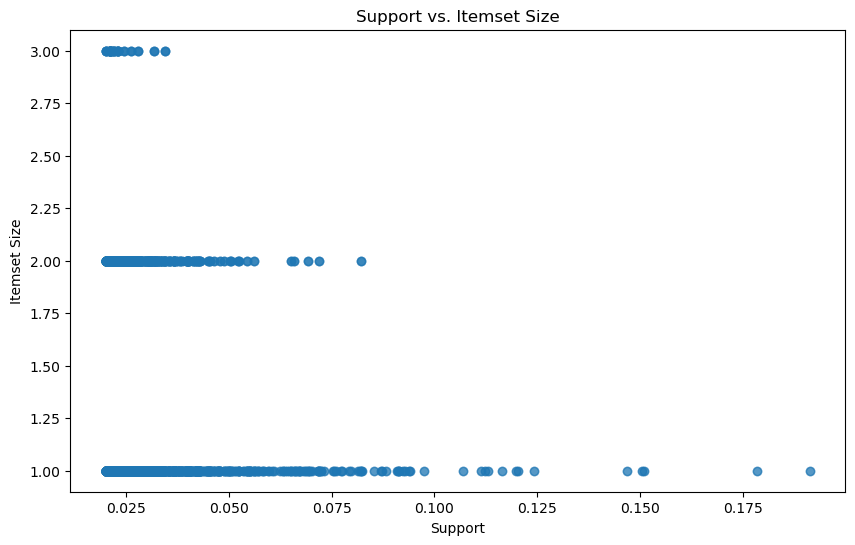

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['antecedents'].apply(len), alpha=0.5)
plt.title('Support vs. Itemset Size')
plt.xlabel('Support')
plt.ylabel('Itemset Size')
plt.show()